<a href="https://colab.research.google.com/github/saimumadil24/FakeNewsDetection/blob/main/FakeNewsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score , confusion_matrix
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
#Importing dataset
data=pd.read_csv('/content/drive/MyDrive/Datasets/news.csv')
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
#Shape of the dataset
data.shape

(6335, 4)

<Axes: xlabel='count', ylabel='label'>

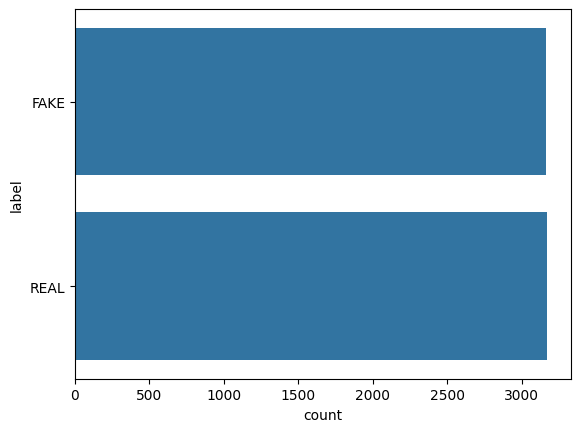

In [7]:
#The ratio of the dataset
sb.countplot(data['label'])

In [8]:
data['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [9]:
#Dataset is balanced. That's we can continue to the splitting dataset
x=data['text']
y=data['label']

In [10]:
#taking train and test dataset
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=7)

In [11]:
#initialize the tfidfvectorizer and fittng the x dataset
tfdf=TfidfVectorizer(stop_words='english',max_df=.7)
xtraintf=tfdf.fit_transform(xtrain)
xtesttf=tfdf.transform(xtest)

In [12]:
#model evalueation
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(xtraintf,ytrain)

PassiveAggressiveClassifier(max_iter=50)

In [13]:
#Score for this
ypred=pac.predict(xtesttf)
pac.score(xtesttf,ytest)

0.9273875295974744

In [14]:
#Trhough accuracy score and confusion matrix
score_1=accuracy_score(ytest,ypred)
mat=confusion_matrix(ytest,ypred)
print(f"Accuracy Score: {score_1}, Confusion Matrix: {mat}")

Accuracy Score: 0.9273875295974744, Confusion Matrix: [[587  51]
 [ 41 588]]


In [15]:
#function for model evaluation
def model_creation(model,model_name):
  model.fit(xtraintf,ytrain)
  pred=model.predict(xtesttf)
  score=accuracy_score(ytest,pred)
  matrix=confusion_matrix(ytest,pred)
  print(f""" Results for {model_name}
  Accuracy Score: {score} , Confusion Matrix: {matrix}""")

In [16]:
#Calling the classifier models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [17]:
#declaring a dictionary for models
models={'Decision Tree Classifier': DecisionTreeClassifier(),
        'Random Forest Classifier': RandomForestClassifier(),
        'Multinomial NB': MultinomialNB(),
        'Logistic Regression': LogisticRegression(),
        'Passive Aggressinve Classifier': PassiveAggressiveClassifier(max_iter=50),
        'Linear SVC': LinearSVC(),
        'KNeighbors Classifier': KNeighborsClassifier(),
        'Gradiendt Boost Classifier': GradientBoostingClassifier(),
        'AdaBoost Classifier': AdaBoostClassifier()}

In [18]:
#The final execution and pick the best model
best_score=0
best_model= None
for name,mods in models.items():
  model_creation(mods,name)
  score=accuracy_score(ytest,mods.predict(xtesttf))
  if score>best_score:
    best_score=score
    best_model=mods

 Results for Decision Tree Classifier
  Accuracy Score: 0.8121546961325967 , Confusion Matrix: [[513 125]
 [113 516]]
 Results for Random Forest Classifier
  Accuracy Score: 0.904498816101026 , Confusion Matrix: [[575  63]
 [ 58 571]]
 Results for Multinomial NB
  Accuracy Score: 0.840568271507498 , Confusion Matrix: [[450 188]
 [ 14 615]]
 Results for Logistic Regression
  Accuracy Score: 0.9171270718232044 , Confusion Matrix: [[600  38]
 [ 67 562]]
 Results for Passive Aggressinve Classifier
  Accuracy Score: 0.9289660615627466 , Confusion Matrix: [[590  48]
 [ 42 587]]
 Results for Linear SVC
  Accuracy Score: 0.9321231254932912 , Confusion Matrix: [[603  35]
 [ 51 578]]
 Results for KNeighbors Classifier
  Accuracy Score: 0.5611681136543015 , Confusion Matrix: [[636   2]
 [554  75]]
 Results for Gradiendt Boost Classifier
  Accuracy Score: 0.89344909234412 , Confusion Matrix: [[580  58]
 [ 77 552]]
 Results for AdaBoost Classifier
  Accuracy Score: 0.8792423046566693 , Confusion Ma

In [19]:
#importing pickle for saving the model to deployment
import pickle as pk

In [21]:
#saving the model
with open('best_model.pkl','wb') as f:
  pk.dump((best_model,tfdf),f)

In [22]:
best_model.predict(xtesttf)

array(['REAL', 'FAKE', 'REAL', ..., 'REAL', 'FAKE', 'REAL'], dtype=object)

In [23]:
a="""For the third time, Donald Trump has earned enough delegates to win the Republican presidential nomination after securing wins in Mississippi, Georgia, and Washington state. He will not officially become the nominee until the Republican National Convention delegates vote this summer.

Before Tuesday's primaries, the GOP frontrunner had an estimated 1,075 delegates, with 1,215 being the required number for a majority of delegates to the RNC in Milwaukee in July. This win ensures that Trump has plenty of leeway to transform the GOP operation - including fundraising - to his liking and focus on a rematch with President Joe Biden.

Earlier in the day, Biden secured the Democratic nomination after wins in Georgia, Mississippi, Washington and the Northern Mariana Islands."""

In [25]:
text=tfdf.transform([a])

In [26]:
pr=best_model.predict(text)

In [31]:
pr[0]

'REAL'